In [223]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data viz
import seaborn as sns # advance data viz
from warnings import filterwarnings
filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangalore/banglore.csv


In [224]:
df = pd.read_csv('/kaggle/input/bangalore/banglore.csv')

In [225]:
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [226]:
cols, rows = df.shape
print(f"the data frame has {cols} columns and {rows} rows")

the data frame has 13320 columns and 9 rows


In [227]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [228]:
# null values in columns (percentage)
print(round(df.isnull().sum()/len(df)*100,2))

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64


<AxesSubplot:>

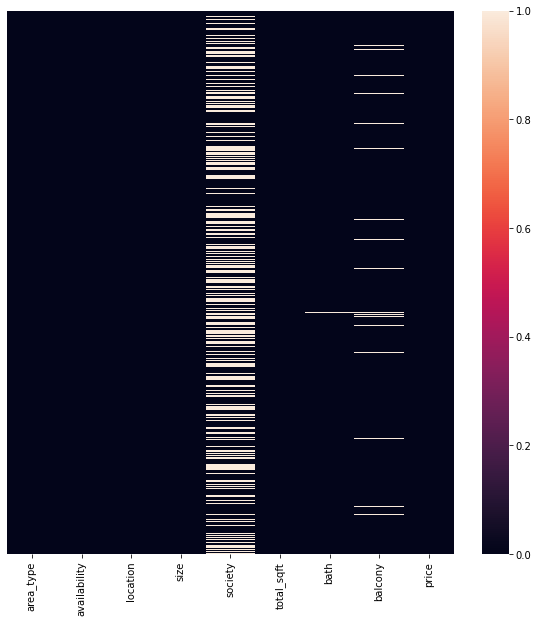

In [229]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False)

In [230]:
# dropping society column as it has many null values
df.drop('society',axis=1,inplace=True)

In [231]:
# checking availability of homes
round(df.availability.value_counts(normalize=True)*100,2)

Ready To Move    79.44
18-Dec            2.30
18-May            2.21
18-Apr            2.03
18-Aug            1.50
                 ...  
15-Aug            0.01
17-Jan            0.01
16-Nov            0.01
16-Jan            0.01
14-Jul            0.01
Name: availability, Length: 81, dtype: float64

In [232]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [233]:
# Renaming Immediate Possession to Read to Move as it means same
df.availability.replace('Immediate Possession','Ready To Move',inplace=True)

In [234]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [235]:
# creating a function to rename all values to availability which are not Ready to Move to Will be Available
def will_be_avlbl(x):
    if x != 'Ready To Move':
        x = 'Will be Available'
        return x
    else:
        return x

In [236]:
df.availability = df.availability.apply(lambda x : will_be_avlbl(x))

<AxesSubplot:>

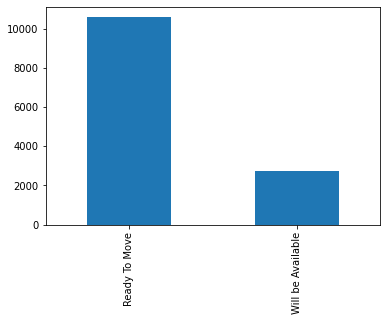

In [237]:
df.availability.value_counts().plot(kind='bar')

In [238]:
#checking Null values in 
df[df.location.isnull()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,1600,3.0,2.0,86.0


In [239]:
df.location.fillna(value=df.location.mode,inplace=True)

In [240]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [241]:
# converting 1RK to O.5BHK
df['size'].replace('1 RK','0.5 BHK',inplace=True)

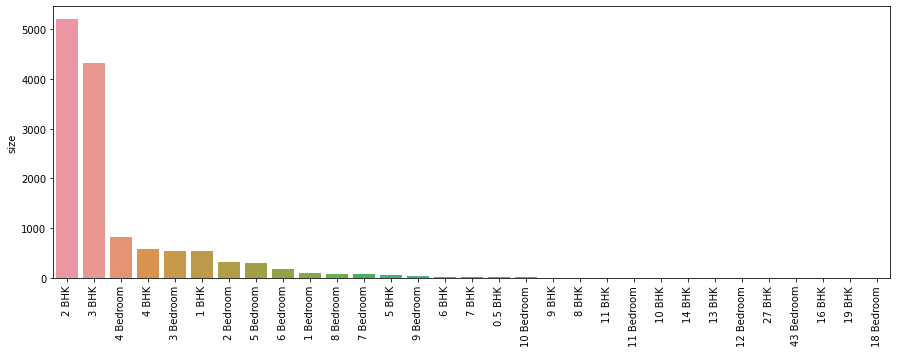

In [242]:
x = df['size'].value_counts().to_frame()
plt.figure(figsize=(15,5))
sns.barplot(x=x.index,y=x['size'])
plt.xticks(rotation=90)
plt.show()

In [243]:
df['size'].fillna(0,inplace=True)

In [244]:
#Removing word 'BHK' from columns
extr = df['size'].str.extract('(\d+)')

In [245]:
df['size'] = extr.astype(float)

In [246]:
df.dtypes

area_type        object
availability     object
location         object
size            float64
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [247]:
#creating a function to check if value is float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [248]:
test = df.total_sqft.apply(lambda x :is_float(x))

In [249]:
df[test==False]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Will be Available,Yelahanka,4.0,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,Will be Available,Devanahalli,4.0,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,Will be Available,Hennur Road,4.0,2957 - 3450,NaN,NaN,224.500
122,Super built-up Area,Will be Available,Hebbal,4.0,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,Will be Available,8th Phase JP Nagar,2.0,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,Will be Available,Talaghattapura,3.0,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2.0,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1.0,1020 - 1130,NaN,NaN,52.570
13265,Super built-up Area,Will be Available,Hoodi,2.0,1133 - 1384,2.0,0.0,59.135


In [250]:
# finding the average sqft from the range
def average_sqft(x):
    i = x.split('-')
    if len(i)== 2:
        return (float(i[0])+float(i[-1])/2)
    try:
        return float(x)
    except:
        return x

In [251]:
df.total_sqft = df.total_sqft.apply(lambda x: average_sqft(x))

In [252]:
test = df.total_sqft.apply(lambda x :is_float(x))
df[test==False]

,area_type,availability,location,size,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1.0,34.46Sq. Meter,1.0,0.0,18.50
648,Built-up Area,Ready To Move,Arekere,9.0,4125Perch,9.0,NaN,265.00
775,Built-up Area,Ready To Move,Basavanagara,1.0,1000Sq. Meter,2.0,1.0,93.00
872,Super built-up Area,Ready To Move,Singapura Village,2.0,1100Sq. Yards,2.0,NaN,45.00
1019,Plot Area,Will be Available,Marathi Layout,1.0,5.31Acres,1.0,0.0,110.00
1086,Plot Area,Will be Available,Narasapura,2.0,30Acres,2.0,2.0,29.50
1400,Super built-up Area,Ready To Move,Chamrajpet,9.0,716Sq. Meter,9.0,1.0,296.00
1712,Plot Area,Ready To Move,Singena Agrahara,3.0,1500Sq. Meter,3.0,1.0,95.00
1743,Super built-up Area,Will be Available,Hosa Road,3.0,142.61Sq. Meter,3.0,1.0,115.00
1821,Plot Area,Ready To Move,Sarjapur,3.0,1574Sq. Yards,3.0,1.0,76.00


In [253]:
#creating a copy of dataframe
df_copy = df.copy(deep=True)

In [254]:
# dropping the row which caused the error in location value counts
df_copy.drop(df_copy.iloc[563].name,inplace=True)

In [255]:
# creating a function to change the values
def str_num(x):
    num=str(x)
    if num.endswith('Sq. Meter'):
        return float(x.replace('Sq. Meter'," "))*10.764
    elif num.endswith('Sq. Yards'):
        return float(x.replace('Sq. Yards',''))*9
    elif num.endswith('Cents'):
        return float(x.replace('Cents',''))*435.56
    elif num.endswith('Acres'):
        return float(x.replace('Acres',''))*43560
    elif num.endswith('Perch'):
        return float(x.replace('Perch',''))*272.25
    elif num.endswith('Guntha'):
        return float(x.replace('Guntha',''))*1089
    elif num.endswith('Grounds'):
        return float(x.replace('Grounds',''))*2400
    else:
        return x   

In [256]:
df_copy['total_sqft'] = df_copy['total_sqft'].apply(lambda x: str_num(x))

In [257]:
df_copy[df.balcony.isna()]

,area_type,availability,location,size,total_sqft,bath,balcony,price
6,Super built-up Area,Will be Available,Old Airport Road,4.0,2732.0,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4.0,3300.0,4.0,NaN,600.00
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1020.0,6.0,NaN,370.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3.0,1925.0,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2.0,1296.0,2.0,NaN,81.00
...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Kundalahalli Colony,7.0,1400.0,7.0,NaN,218.00
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6.0,1200.0,5.0,NaN,130.00
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4.0,1200.0,5.0,NaN,325.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3.0,1675.0,3.0,NaN,92.13


In [258]:
df_copy.balcony.fillna(1,inplace=True)

In [259]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   size          13303 non-null  float64
 4   total_sqft    13319 non-null  float64
 5   bath          13246 non-null  float64
 6   balcony       13319 non-null  float64
 7   price         13319 non-null  float64
dtypes: float64(5), object(3)
memory usage: 936.5+ KB


In [260]:
df_copy.isna().sum()

area_type        0
availability     0
location         0
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [261]:
df_copy.dropna(inplace=True)

In [262]:
df_copy.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

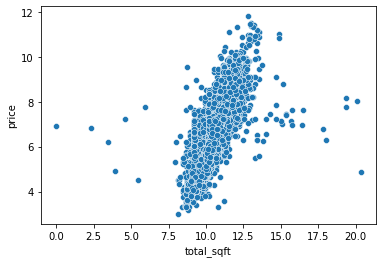

In [263]:
sns.scatterplot(x=np.log2(df_copy['total_sqft']),y=np.log2(df_copy.price))

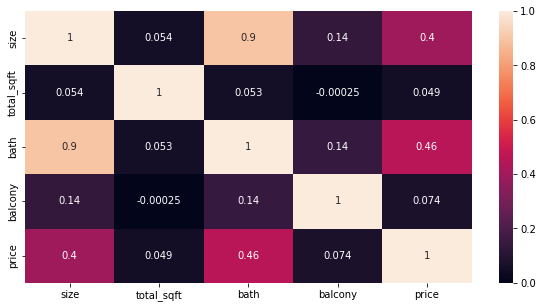

In [264]:
plt.figure(figsize=(10,5))
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

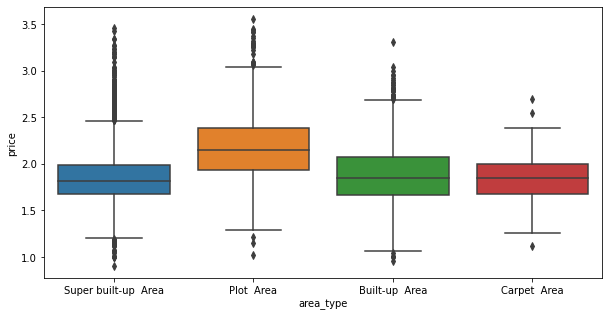

In [265]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['area_type'],y=np.log10(df_copy.price))
plt.show()

In [266]:
df_copy.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price'],
      dtype='object')

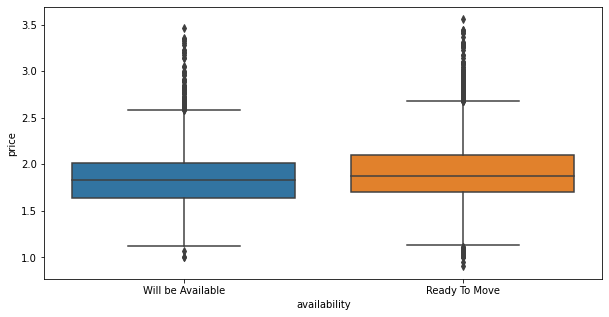

In [267]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['availability'],y=np.log10(df_copy.price))
plt.show()

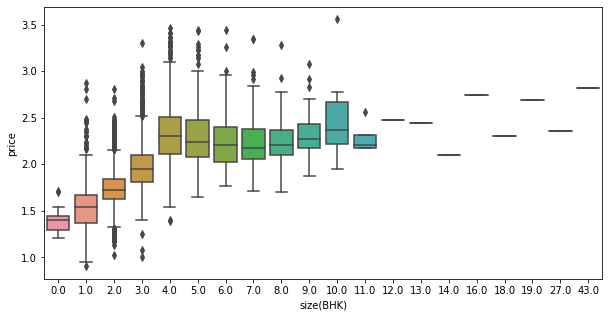

In [268]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['size'],y=np.log10(df_copy.price))
plt.xlabel('size(BHK)')
plt.show()

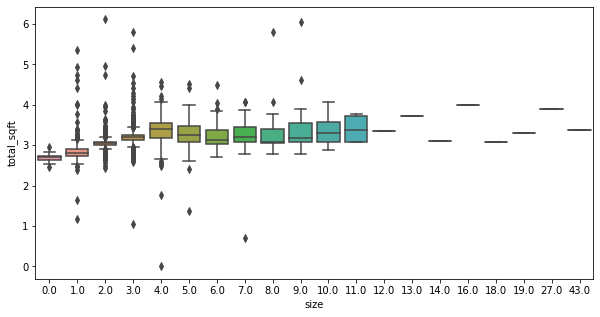

In [269]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['size'],y=np.log10(df_copy.total_sqft))
#plt.xlabel('size(BHK)')
plt.show()

In [270]:
location = df_copy.location.value_counts().to_frame()

In [271]:
arr = list(location.nlargest(50,location).index)

In [272]:
def temp(x):
    if x not in arr:
        return 'other'
    else :
        return x

In [273]:
df_copy.location = df_copy.location.apply(lambda x : temp(x))

In [274]:
df_copy['price'] = df['price']*100000
df_copy['price_per_sqft'] = round((df_copy['price']/df_copy['total_sqft']),2)

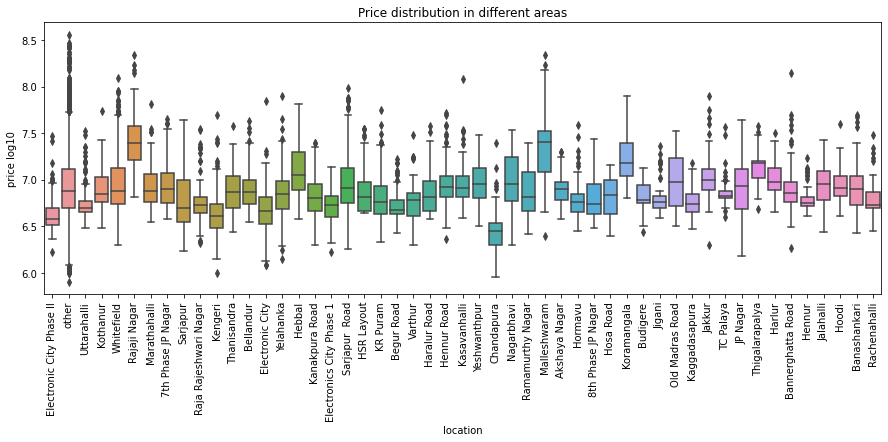

In [275]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df_copy.location,y=np.log10(df_copy.price))
plt.title('Price distribution in different areas')
plt.ylabel("price log10")
plt.xticks(rotation=90)
plt.show()

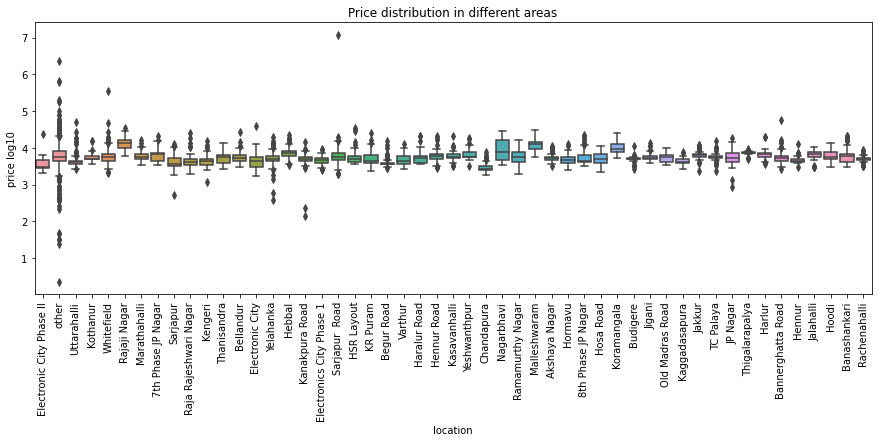

In [276]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df_copy.location,y=np.log10(df_copy.price_per_sqft))
plt.title('Price distribution in different areas')
plt.ylabel("price log10")
plt.xticks(rotation=90)
plt.show()

In [277]:
def rmv_outlierBy_std(x):
    out_df = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) & (subdf.price_per_sqft < (mean + std))]
        out_df = pd.concat([out_df, reduced_df], ignore_index = True)
    return out_df

final = rmv_outlierBy_std(df_copy)

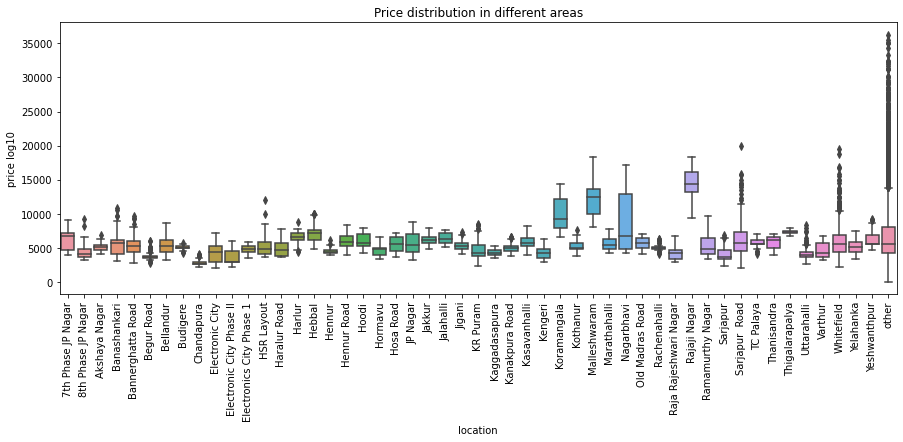

In [278]:
plt.figure(figsize=(15,5))
sns.boxplot(x=final.location,y=(final.price_per_sqft))
plt.title('Price distribution in different areas')
plt.ylabel("price log10")
plt.xticks(rotation=90)
plt.show()

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [280]:
final = pd.get_dummies(df_copy)

In [281]:
X = minmax_scale(final.drop('price',axis=1))
y = final.price.values

In [282]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1,train_size=0.8)

In [283]:
forest = RandomForestRegressor()

In [284]:
forest.fit(x_train,y_train)

RandomForestRegressor()

In [285]:
Y_pred = forest.predict(x_test)

In [286]:
forest.score(X,y)

0.9926251282977608

In [287]:
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,mean_squared_error

In [288]:
r2_score(y_test,Y_pred)

0.9773015280279803

In [289]:
print(f'mean squrared error: - {mean_squared_error(y_test,Y_pred)}')
print(f'mean absolute error:- {mean_absolute_error(y_test,Y_pred)}')

mean squrared error: - 5625749276017.288
mean absolute error:- 239755.87886043725


In [290]:
Gb = GradientBoostingRegressor()

In [291]:
Gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [292]:
y_predict = Gb.predict(x_test)

In [293]:
Gb.score(x_train,y_train)

0.9964361881975787

In [294]:
r2_score(y_test,y_predict)

0.9776311972153993

In [295]:
print(f'mean squrared error: - {mean_squared_error(y_test,y_predict)}')
print(f'mean absolute error:- {mean_absolute_error(y_test,y_predict)}')

mean squrared error: - 5544041741046.06
mean absolute error:- 565233.7915085152
